Random Forest Classifer - Atmospheric Data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc
import graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from matplotlib.legend_handler import HandlerLine2D

In [2]:
#read file
a_data = pd.read_csv('atmospheric_weather_preprocessed.csv')
b_data = pd.read_csv('SAGEMAKER_atmospheric.csv')
a_data.head()

,pressure,temperature,humidity,image
0,200,217.770279,8.306047,0
1,350,239.403473,5.289028,0
2,325,236.103195,4.626761,0
3,300,232.266129,5.750836,0
4,275,228.088684,5.880545,0


In [3]:
#identify variables
X = np.array(a_data.iloc[:,0:3])
Y = np.array(a_data['image'])

In [4]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

In [5]:
#preform random forest 
a_rf_c = RandomForestClassifier()
a_rf_c.fit(X_train, Y_train)
pred = a_rf_c.predict(X_test)

In [6]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test,pred)

roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC AUC: ', roc_auc)

ROC AUC:  0.5035713587935862


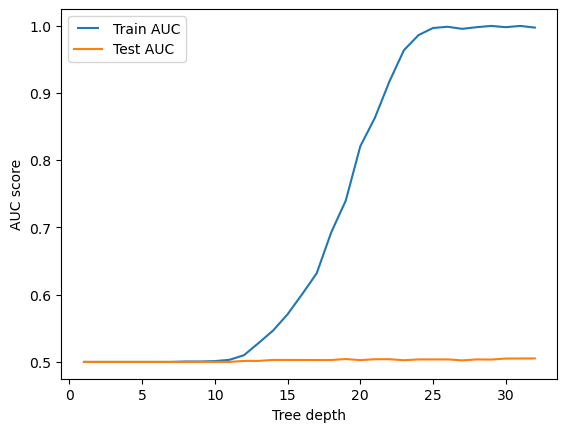

In [7]:
max_depths = np.arange(1, 33)

train_results = []
test_results = []

for max_depth in max_depths:
    a_rf_c = RandomForestClassifier(max_depth=max_depth, n_jobs=-1) 
    a_rf_c.fit(X_train, Y_train)
    
    train_pred = a_rf_c.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    test_pred = a_rf_c.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, label="Train AUC")
line2, = plt.plot(max_depths, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [8]:
#show results
print('Accuracy Score: ', accuracy_score(Y_test,pred))

Accuracy Score:  0.9659068770699396


Text(113.9222222222222, 0.5, 'Predicted')

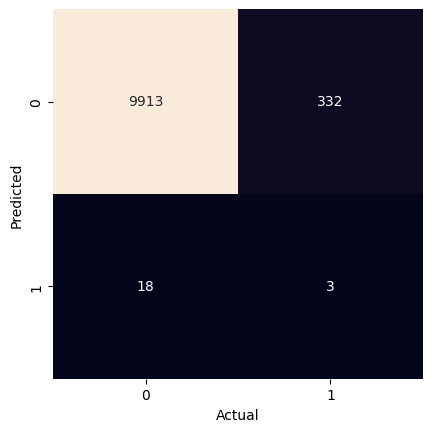

In [9]:
a_mat = confusion_matrix(Y_test, pred)
sns.heatmap(a_mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [10]:
x = np.array(b_data.iloc[:,0:2])
y = np.array(b_data['image'])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30)

In [12]:
b_rf_c = RandomForestClassifier()
b_rf_c.fit(x_train, y_train)
pred = b_rf_c.predict(x_test)

In [13]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)

roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC AUC: ', roc_auc)

ROC AUC:  0.8662371055362266


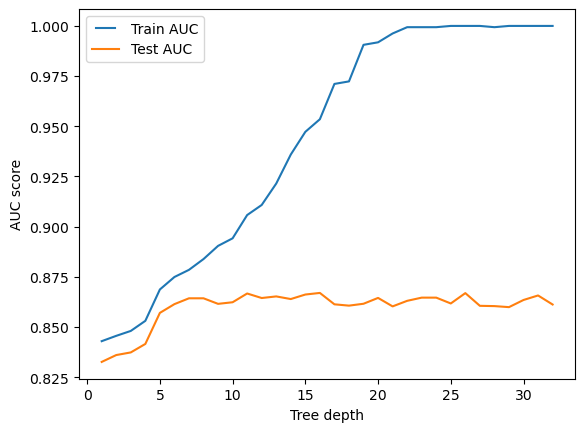

In [14]:
max_depths = np.arange(1, 33)

train_results = []
test_results = []

for max_depth in max_depths:
    b_rf_c = RandomForestClassifier(max_depth=max_depth) 
    b_rf_c.fit(x_train, y_train)
    
    train_pred = b_rf_c.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    test_pred = b_rf_c.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, label="Train AUC")
line2, = plt.plot(max_depths, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [23]:
b_rf_c = RandomForestClassifier(max_depth=5)
b_rf_c.fit(x_train, y_train)
pred = b_rf_c.predict(x_test)

In [24]:
print('Accuracy Score: ', accuracy_score(y_test,pred))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)

roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC AUC: ', roc_auc)

Accuracy Score:  0.906871609403255
ROC AUC:  0.8526826588536898


Text(113.9222222222222, 0.5, 'Predicted')

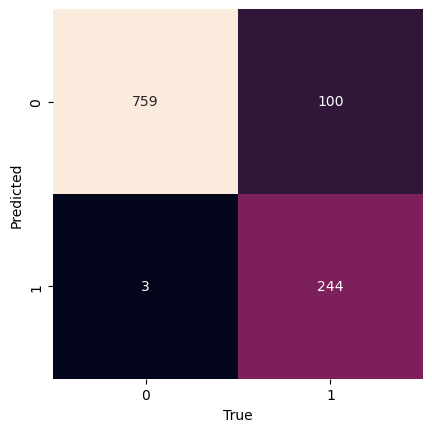

In [25]:
b_mat = confusion_matrix(y_test, pred)
sns.heatmap(b_mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')